#Convolution: Generalizing Interpolation

---
A key point that we learned from piecewise interpolation (be it, piecewise constant, linear or cubic) is that knowing the output to a unit sample at $t=0$ is enough to figure out the output produced by an arbitrary sequence of equi-spaced samples. In particular for tuples $\{(t_i, x(t_i)), i \in \mathcal I\}$, where the first element of the pair indicating the instant and second the sample value, we get the output
$$
y(t) = \sum_{i \in \mathcal I} x(t_i) h(t-t_i),
$$ 
where $h(t)$ is the output to a unit sample at $t=0$. We call $h(t)$ as the *response of the interpolator*.  The two keywords are **replacement** of samples (with scaled and centered response) and **superposition** (for each $t\in\mathbb R$, over the index set $\mathcal I$). We now generalize the idea of replacement and superposition to form an operation which  plays a central role in signal processing and mathematical analysis, this operation is known as **convolution**.

First, we like to use more general response functions $h(t)$ than just piecewise polynomials. Second, our input may not be a set of samples, but a continuous function $x(t)$ itself. One flip side of this generalization is that mental the picture of interpolating between samples using `smooth' curves may be lost, but this can be recovered in an approximate sense (with more work of course!). Let us be brave, and ask for a definition of 
$$
y(t) = x(t) \, ✳ \, h(t),
$$
where ✳ is an operator which computes the convolution between $x(t)$ and $h(t)$. In order to avoid pitfalls, let us take $x(t)$ to be a bounded function and $h(t)$ to be integrable (these two requirements can be swapped). Notice that the ✳ operator should produce piecewise polynomial interpolation when presented with input samples to a response function $h(t)$.

In the example below we calculate the convolution between
\begin{align}
x(t) = \frac 32 \exp(-2 t^2), -3 \leq t \leq 3
\end{align}
and
\begin{align}
h(t) = \cos(\frac \pi 2 t), -1 \leq t \leq 1. \phantom{wi}
\end{align}
Looks complicated, but what we learned so far is enough. Let us start by plotting the two functions.

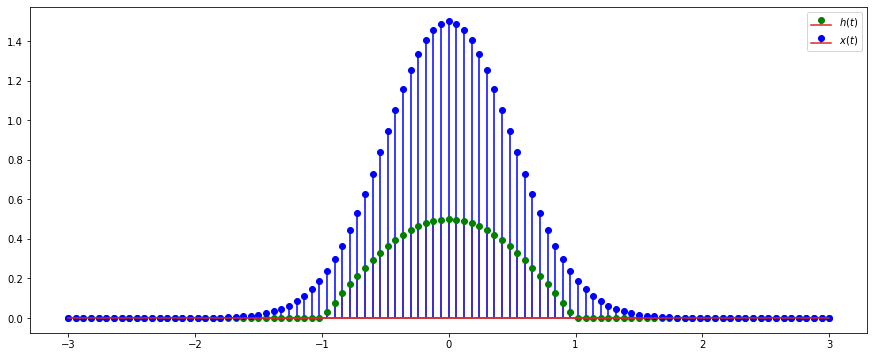

In [ ]:
import matplotlib.pyplot as plt; import numpy as np; plt.rcParams['figure.figsize']= [15,6]

t = np.linspace(-3,3,101)

bx = 1.5*np.exp(-2.0*t*t);              # samples of x(t)
bh = 0.5*np.cos(0.5*np.pi*t)*(np.abs(t)<1); # samples of h(t)

plt.stem(t,bh, 'orange', markerfmt='go', use_line_collection=True)  # plotting h(t)
plt.stem(t,bx, 'b', markerfmt='bo', use_line_collection=True)       # plotting x(t)
plt.legend(['$h(t)$','$x(t)$'])

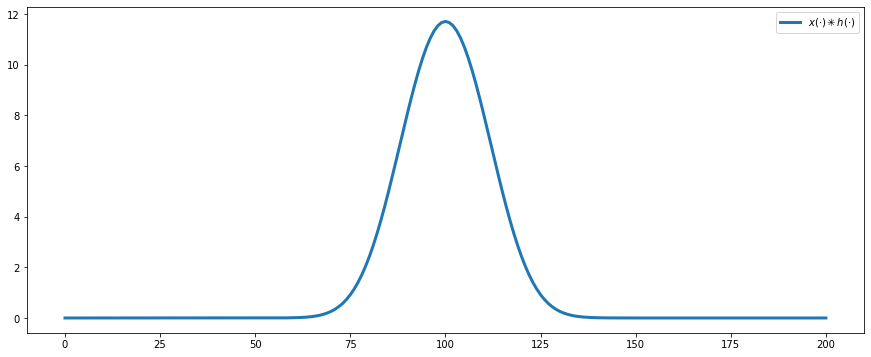

In [ ]:
plt.plot(np.convolve(bx,bh), linewidth=3)  # This step computes the discrete convolution and then linearly interpolates the plot.
plt.legend(['$x(\cdot) \, ✳ \, h(\cdot)$'])

So the convolution of $x(t)$ and $h(t)$ will look like the plot in the figure above. We intentionally avoid plotting along a time axis. If you observe closely, what we have plotted are samples produced by *np.convolve(bx,bh)*, and the plot function linearly interpolated these samples. So how close is the plot to the analog waveform $y(t) = x(t) \, ✳ \, h(t)$? Let us find out, using some basic ideas of the so called **Riemann Integral**.

A function $v(t)$ is given in the figure below as the blue curve, for the interval $[a,b]$. Suppose we are interested in finding 
$$
I = \int_{a}^b v(t) \, dt.
$$
Riemann's approach to this integral is to divide the area enclosed by the function and the $x-$ axis into rectangles of equal width, the height of the rectangles will correspond to the function value inside the width considered. One can take the maximum value or minimum value or the middle value, the last option is shown in the plot as the orange curve.

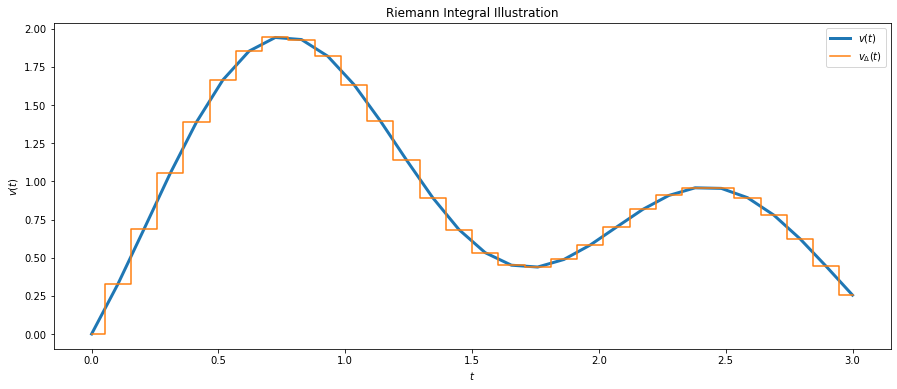

In [ ]:
#@title Function $v(t): \mathbb R \rightarrow \mathbb R$
#vector generated in EE229 sheet.
t = np.linspace(0,3,30);
vi = [1.26690585e-16, 3.26352992e-01, 6.88425377e-01, 1.05395186e+00, 1.38936961e+00, 1.66389649e+00, 1.85330296e+00, 1.94286595e+00, 1.92910253e+00, 1.82004865e+00, 1.63404998e+00, 1.39723769e+00,
 1.14004321e+00, 8.93235360e-01, 6.84022917e-01, 5.32747349e-01, 4.50598055e-01, 4.38630059e-01, 4.88175381e-01, 5.82542089e-01, 6.99718356e-01, 8.15667954e-01, 9.07736196e-01, 9.57689479e-01, 9.53984080e-01, 8.92987824e-01, 7.79040574e-01, 6.23410905e-01, 4.42361035e-01, 2.54647909e-01]
plt.title('Riemann Integral Illustration'); plt.xlabel('$t$'); plt.ylabel('$v(t)$')
plt.plot(t, vi, linewidth=3)
plt.step(t, vi, where='mid')
plt.legend(['$v(t)$','$v_{\Delta}(t)$'])


In other words, we took a  piecewise constant approximation of $v(t)$, let us call this approximation as $v_{\Delta}(t)$, where $\Delta$ is the width of the rectangles used. The idea is that for many analog signals we encounter, like the $v(t)$ shown here, we can approximate
$$
\int_a^b v(t)\, dt \approx \int_a^b v_{\Delta}(t)\, dt.
$$
Here the approximation gets closer as $\Delta \downarrow 0$, and the limiting value is called the Riemann Integral. For our purpose, we will visualize using $v_{\Delta}(t)$ instead of $v(t)$, and limit the further considerations to those cases where such approaches to integrals work as $\Delta \downarrow 0$. This will ensure that no mathematical precision is really lost, while we gain on the physics underneath.

---

An alternate way to look at $v_{\Delta}(t)$ is to express it as a convolution for some small positive $\Delta$. This idea we have already encountered, albeit in reverse. In the following figure, note that
$$
x_{\Delta}(t) = \bar x \,✳\, \text{rect}_{\Delta}(t),
$$
where $\bar x$ denotes the sequence of samples which are separated by $\Delta$ units along the $x$-axis, i.e. the values marked by a circle on top of the dotted lines shown in the figure below, given by $x_i = x(t_i), i \in \mathcal I$.

<StemContainer object of 3 artists>

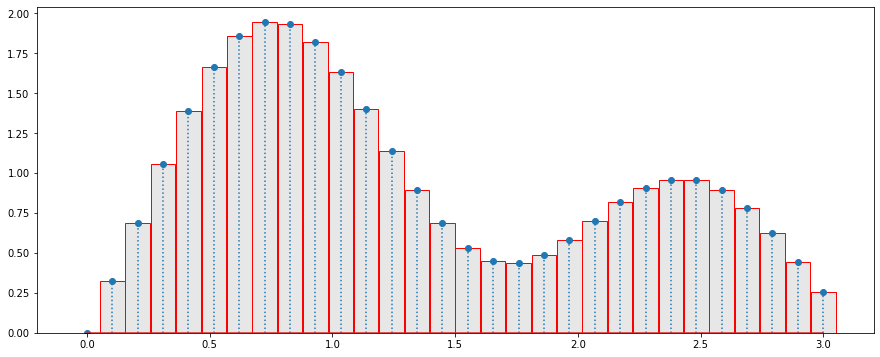

In [ ]:
plt.bar(t,vi, width=0.1, color=(0.1,0.1,0.1,0.1),edgecolor='red')
plt.stem(t,vi,':', use_line_collection=True)

Now suppose we are asked to compute the convolution of $x(t)$ and $h(t)$. A natural thing to try out is to approximate $x(t)$ and $h(t)$ respectively by $x_{\Delta}(t)$ and $h_{\Delta}(t)$, their piecewise constant approximations.
\begin{align}
y(t) &= x(t) \,✳\, h(t) \\
  &\approx x_{\Delta}(t) \,✳\, h_{\Delta}(t) \\
  &= \text{rect}_{\Delta}(t) \, ✳ \,\bar x \,✳\, \bar h \,✳\, \text{rect}_{\Delta}(t).
\end{align}
We desire that the convolution operator be commutative, and our definition later will ensure that. Appealing to this commutative property, we can write
\begin{align}
x_{\Delta}(t) \,✳\, h_{\Delta}(t) &= \bar x \,✳\, \bar h \,✳\, \text{rect}_{\Delta}(t) \,✳\, \text{rect}_{\Delta}(t).
\end{align}
Notice that the first convolution operator is something we have already learnt and named as discrete convolution (**DisCoES**) of equi-spaced samples. So let us multilpy the vectors using our regular classroom approach, but omitting any carry addition steps. This will result in 
$$
\bar y = \bar h \, ✳\, \bar x
$$
and  taking  $r(t) :=  \text{rect}_{\Delta}(t) \,✳\, \text{rect}_{\Delta}(t)$, the output $y(t)$ can be approximated as 
$$
y(t) \approx \bar y \, ✳ \, r(t),
$$
which is nothing but passing equi-spaced samples of $\bar y$ (placed $\Delta$ apart) through a generalized interpolator with response $r(t)$. Suppose $r(t)$ is a triangle $\text{trian}_{2\Delta}(t)$ of height $\Delta$ and basewidth $2\Delta$, then the RHS of above is the linear interpolation of $\bar y$ scaled by $\Delta$. It turns out that this is indeed a consistent choice, i.e.
$$
\text{rect}_{\Delta}(t) \,✳\, \text{rect}_{\Delta}(t) = \Delta \,\,\,\text{trian}_{2\Delta}(t)
$$ 

Overall, we have a discrete convolution step followed by linear interpolation, and this approach will help us reach the actual convolution $y(t) = x(t) \,✳\, h(t)$ when $\Delta \downarrow 0$, except for some pathological cases we ignore here.

In fact Python numpy has a function which will do the DisCo for you. For the same vectors given in the first figure of this page
*np.convolve(bh, bx)* will do the job, and **plt.plot(np.convolve(bh,bx))** will do the linear interpolation as well. So your $y(t) = x(t) \,✳\, h(t)$ for the functions shown in the first figure of this page, will nearly be the one plotted in the second figure. Let us plot this along the marked time axis now. Observe that the function is uniformly zero everywhere outside the interval $[-4,4]$.

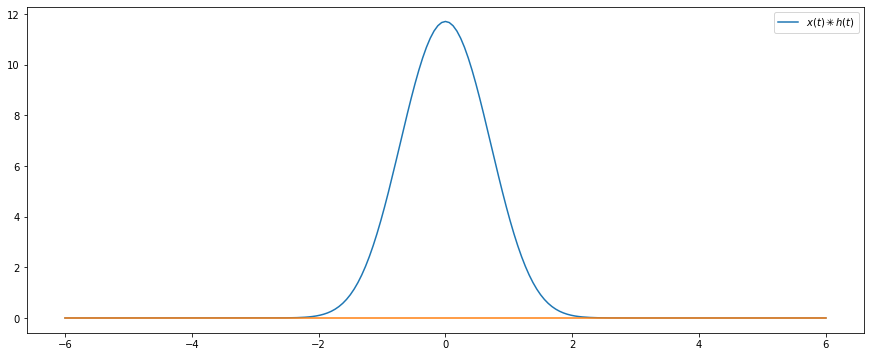

In [ ]:
tx  = np.linspace(-6,6,201)   # Generating the time axis.
plt.plot(tx, np.convolve(bx,bh))
plt.plot(tx, np.zeros(201))
plt.legend(['$x(t) \,✳\, h(t)$'])

#Making it look good

Hopefully now we understand convolution, and its connection to interpolation etc. For computation, all we really need to know is that 
 $$
\text{rect}_{\Delta}(t) \,✳\, \text{rect}_{\Delta}(t) = \Delta \,.\,\,\text{trian}_{2\Delta}(t)
$$ 
Let us however try to form a more aesthetic formula for convolution. Notice that
\begin{align}
x(t) \, ✳\, \text{rect}_{\Delta}(t) &\approx x_{\Delta}(t) \, ✳ \, \text{rect}_{\Delta}(t) \\
&= \bar x \, ✳\, \text{rect}_{\Delta}(t) \, ✳ \, \text{rect}_{\Delta}(t)\\
& = \bigl(\bar x \, ✳\, \text{trian}_{\Delta}(t)\bigr) \,\,\Delta \\
&\approx x(t) \Delta, \end{align}
where the approximations are expected to be close when $\Delta$ is very small, for most analog functions. So, in principle, convolution by a narrow rectangle will *approximately* scale that analog function by the width of the rectangle. Using this simple idea, let us now take another look at convolution as
\begin{align}
x(t) \,✳\, h(t) &\approx \bar x \, ✳ \, \text{rect}_{\Delta}(t)\, ✳\, h(t) \\
&= \bar x \, ✳ \,\Bigl( \text{rect}_{\Delta}(t)\, ✳\, h(t) \Bigr) \\
&= \bar x \, ✳\, h(t) \, \Delta \tag{A}
\end{align} 
by the previous result. Convolution of a sequence $\bar x$ with $h(t)$ is nothing but passing the equivalent samples through a system with response $h(t)$. A generalized interpolation idea enables us to write (see first equation of this sheet)
$$
\bar x \, ✳ \, h(t)  = \sum_{i \in \mathcal I} x(t_i) h(t - t_i),
$$
where we have assumed that the equispaced samples are given by $\{(t_i, x(t_i)), i \in \mathcal I\}$. Substituting this in the Equation-(A) above, we get
\begin{align}
x(t) \, ✳\, h(t) &\approx \sum_{i \in \mathcal I} x(t_i) h(t - t_i) \, \Delta \\
&\approx \int_{\tau \in R} x(\tau) h(t - \tau) d\tau,
\end{align}
using the Riemann's approximation of the integral. The formula is expected to be tight for small enough $\Delta$, and we take this as the definition of **convolution**, the aesthetic formula we were searching all along!
$$
x(t) \, ✳ \, h(t) := \int_{\mathbb R} x(t) h(t-\tau) d\tau = \int_{\mathbb R}h(\tau) x(t-\tau) d\tau.
$$

---

For those who worry about the validity of the approximations used here, the consistency of the above definition can be demonstrated using tools of measure theory, but that does not directly reveal the physics and connections to interpolation (I think).

#Problem 5 of Tutorial-I:
 Using the ideas we learned let us compute the convolution of the waveforms given in Question-5 of Tutorial one. For reference, the two functions are shown below.

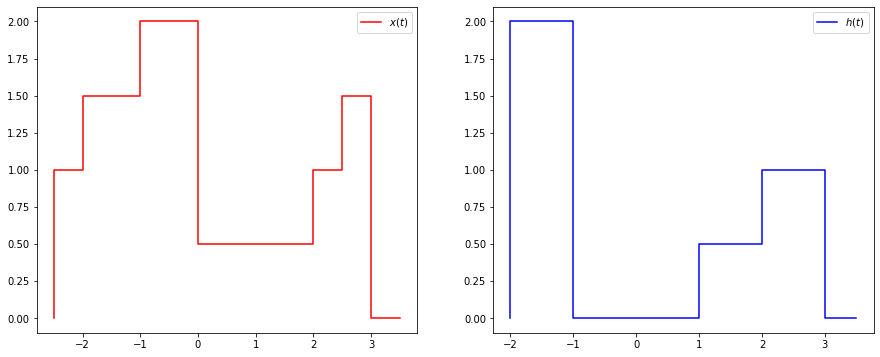

In [ ]:
xval = [0,1,1.5,1.5,2,2,0.5,0.5,0.5,0.5,1,1.5,0]
hval = [0,2,2,0,0,0,0,0.5,0.5,1,1,0]

plt.subplot(1,2,1)
plt.step(np.arange(-2.5,4.0,0.5),xval, 'r', where='pre')
plt.legend(['$x(t)$'])

plt.subplot(1,2,2)
plt.step(np.arange(-2.0,4,0.5),hval,  'b', where='pre')
plt.legend(['$h(t)$'])

If you go inside the code, it will be clear that 
\begin{align}
x(t) &= [1,1.5,1.5,2,2,0.5,0.5,0.5,0.5,1.5] \, ✳ \text{rect}_{0.5}(t) \\
&= \bar x \, ✳ \, \text{rect}_{0.5}(t),
\end{align}
where the samples of $\bar x$ are considered $0.5$ apart in the $x$-axis. Of course we can divide it further into rectangles of with $0.25$ etc, but $0.5$ is the most convenient width here. Now let us divide $h(t)$ also into vertical rectangles of horizontal width $0.5$. Clearly
\begin{align}
h(t) &= [2,2,0,0,0,0,0.5,0.5,1.0,1.0] \, ✳ \text{rect}_{0.5}(t) \\
&= \bar h \, ✳ \, \text{rect}_{0.5}(t).
\end{align}
Here also we take samples in $\bar h$ are equispaced by $0.5$ units on $x$-axis. Though we did not mention the starting time, the first sample of $\bar x$ should be placed at $t=-2.25$, and the first sample of $\bar h$ should be placed at $-1.75$ to faithfully reconstruct $x(t)$ and $h(t)$ by the above convolution expressions. But, for a moment let us not worry about this starting time instants, and compute
\begin{align}
x(t) \, ✳ \, h(t) &= \bar x \, ✳ \, \bar h \, ✳\, \text{rect}_{0.5}(t) \, ✳\, \text{rect}_{0.5}(t) \\
  &= \bar x \, ✳ \, \bar h \, ✳ \, \text{triangle}_{1}(t) . \frac 12
\end{align}
The last formula is nothing but linear interpolation of the samples of $\bar y$ which are equispaced at $0.5$ units apart in $x-$axis, and then scaling  the answer by $\frac 12$. Here $\bar y = \bar h \, ✳ \, \bar x$. After intepolation and scaling we get the waveform $y(\cdot)$, but we have to properly place this in the time axis to get the actual answer. Notice that $x(t)$ starts being non-zero from $t=-2.5$ units, and $h(t)$ starts being non-zero from $t=-2$ units. Thus $x(t) \, ✳ \, h(t)$ will be zero before $-(2.5+2) = -4.5$ units. This is the earliest time at which the convolution starts being non-zero. So $x(t) ✳ h(t)$ can be plotted as follows.

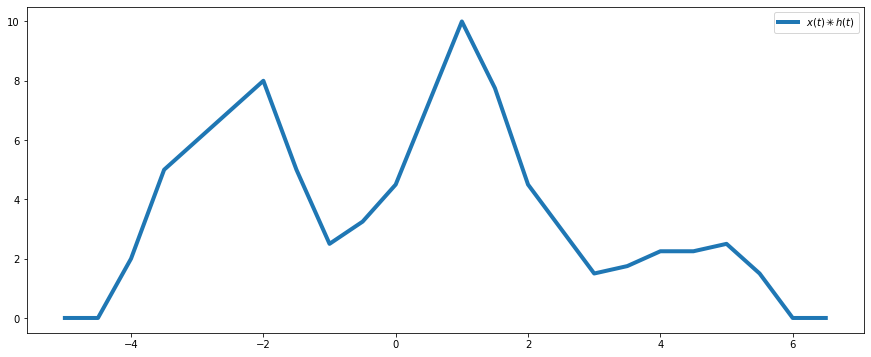

In [ ]:
L = len(np.convolve(xval,hval)) # Length of the output vector after multplication.
plt.plot(np.arange(-5,-5+0.5*L,0.5), np.convolve(xval, hval), linewidth=4)
plt.legend(['$x(t)\, ✳ \,h(t)$']) 

Notice that the output is non-zero before $t=-4.5$ units. Further it is zero after $3+3 = 6$ units of time, commensurate with the sum of the maximum abscissa  points where the corresponding ordinates of $x(t)$ and $h(t)$ are non-zero. So this simple trick will help you align the graph correctly along the time axis.

In the class, *Varad* used a slightly different approach, but this should lead to the same answer. In fact he took the vector 
$$
\bar x = x(t_i) \,,\,\, t_i = -2.5,-2, -1.5, -1,...
$$
In this case 
$$
x(t) = \bar x \,✳\, \text{rect}_{0.5}(t-\frac 14).
$$
A similar expression holds for $h(t)$.
So the final plot of $x(t)\,✳\,h(t)$ should be shifted appropriately such that the output is non-zero right after $t=-4.5$units, but not before.

#Problem 6 of Tutorial-I

The required functions $x(2t)$ and $y(2t)$ are shown in the plots below, followed by the convolution of the two.

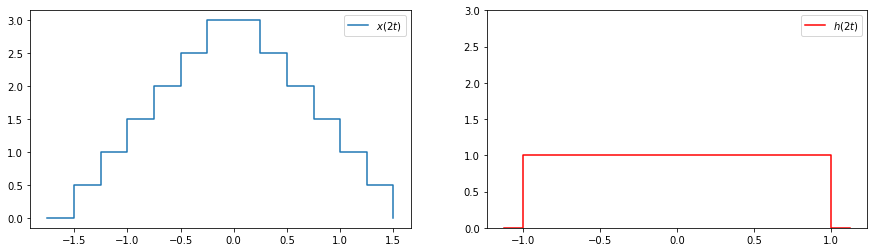

In [ ]:
import numpy as np; import matplotlib.pyplot as plt; plt.rcParams['figure.figsize']= [15,4] 
bx2 = np.array([0,0.5,1,1.5,2,2.5,3,3,2.5,2,1.5,1,0.5,0]);
bh2 = np.array([0]+[1]*8+[0])
by2 = np.convolve(bx2,bh2)

plt.subplot(1,2,1)
plt.step(0.5*np.arange(-3.5,3.5,0.5),bx2, where='post', label='$x(2t)$')
plt.legend()

plt.subplot(1,2,2)
plt.ylim(0,3)
plt.step(0.125+0.5*np.arange(-2.5,2.5,0.5), bh2, 'r', where='mid', label='$h(2t)$')
plt.legend()

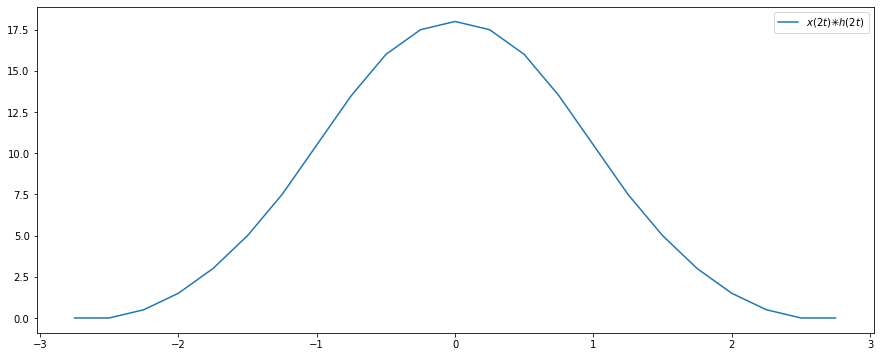

In [ ]:
plt.rcParams['figure.figsize']= [15,6]  #set the figure size
plt.plot(0.25+np.arange(-3,2.75,0.25), by2)
plt.legend(['$x(2t) ✳ h(2t)$'])

#An Alternate View
 Many textbooks look at  convolution as kind of an inner product, these two concepts are very closely related (minor adjustments necessary).  
For easimess, assume that were are considering real valued signals, the convolution $y(t) = x(t) ✳ h(t)$ is expressed
 $$
 y(t) = \int_{\mathbb R} h(\tau) x(t-\tau) d\tau.
 $$
Suppose you are interested in finding $y(0)$, which is nothing but
$$
y(0) = \int_{\mathbb R} h(\tau) x(-tau) d\tau.
$$
The last formula has $x(-\tau)$, a reflection of $x(\tau)$ around the $y-$axis. So we compute the inner product between $h(t)$ and the reflected function $x(-t)$.
$$
y(0) = \bigl\langle h(t), x(-t) \bigr\rangle.
$$
Similarly 
$$
y(\lambda) = \bigl\langle h(t), x(-(t-\lambda)) \bigr\rangle,
$$
which is the inner product between $h(t)$ and the reflected $x(t)$ shifted by $t$ units to the right (reflection followed by right shift by $\tau \in \mathbb R$). We can do this computation for every value of $\lambda \in \mathbb R$, and this will give us the convolution that we seek.

For complex valued signals, the inner product is conventionally defined as
$$
\bigl\langle x(t), h(t) \rangle = \int_{\mathbb R} x(t) \, h^*(t) dt.
$$
Notice the conjugate operation, this is very much required for the inner product of a function with itself to be non-negative. Using this, we can write convolution here also as a suitable inner product.

#Homework 4.1: Draw five cycles of a cosine wave of frequency 50Hz, starting from $t=0$ with an initial phase of 30degrees. Let this waveform be $x(t)$. Compute and plot $x(t) ✳ x(t)$, and find the value of $t$ for which the output has the maximum amplitude. Email the output (only in png format) to srbpteach@gmail.com with the maximal point clearly marked.


[0.097]


<function matplotlib.pyplot.show(*args, **kw)>

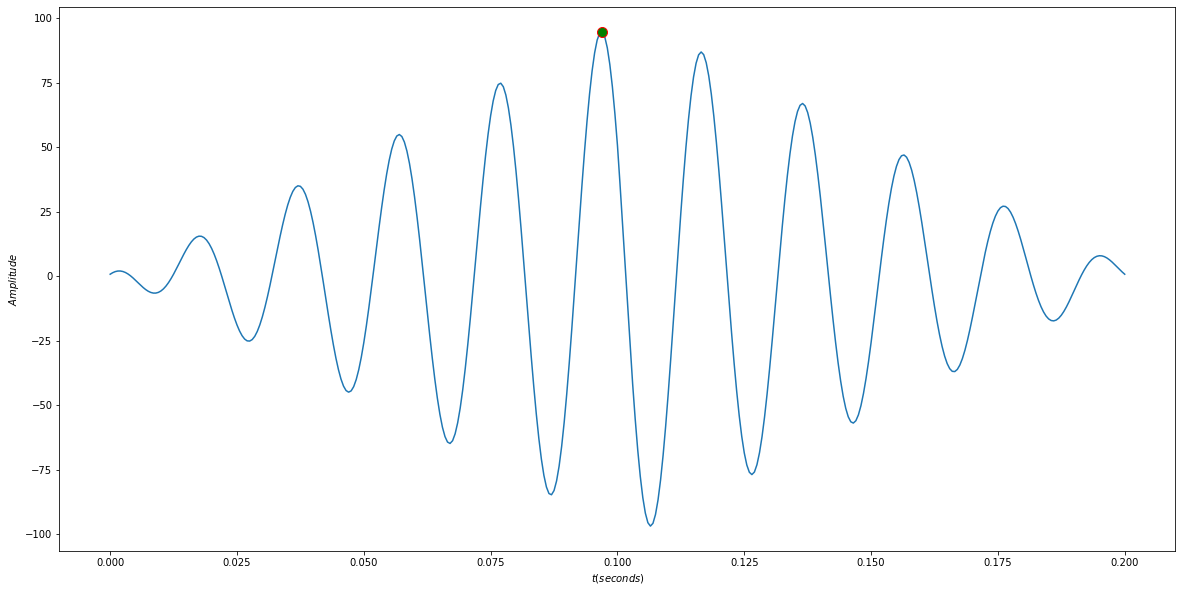

In [ ]:
import matplotlib.pyplot as plt; import numpy as np;
plt.rcParams['figure.figsize']= [20,10]
tx  = np.linspace(0,0.1,201) 
xt   = np.cos(2*np.pi*50*tx+(np.pi/6))
t = np.linspace(0,0.2,401)
c = np.convolve(xt,xt)
plt.plot(t,c)
ymax=max(c)
xpos = np.where( c == ymax)
xmax=t[xpos]
print(xmax)
plt.plot(xmax, ymax, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.xlabel('$t(seconds)$'); plt.ylabel('$Amplitude$')
plt.show

[92.]
401
378.8232451509462


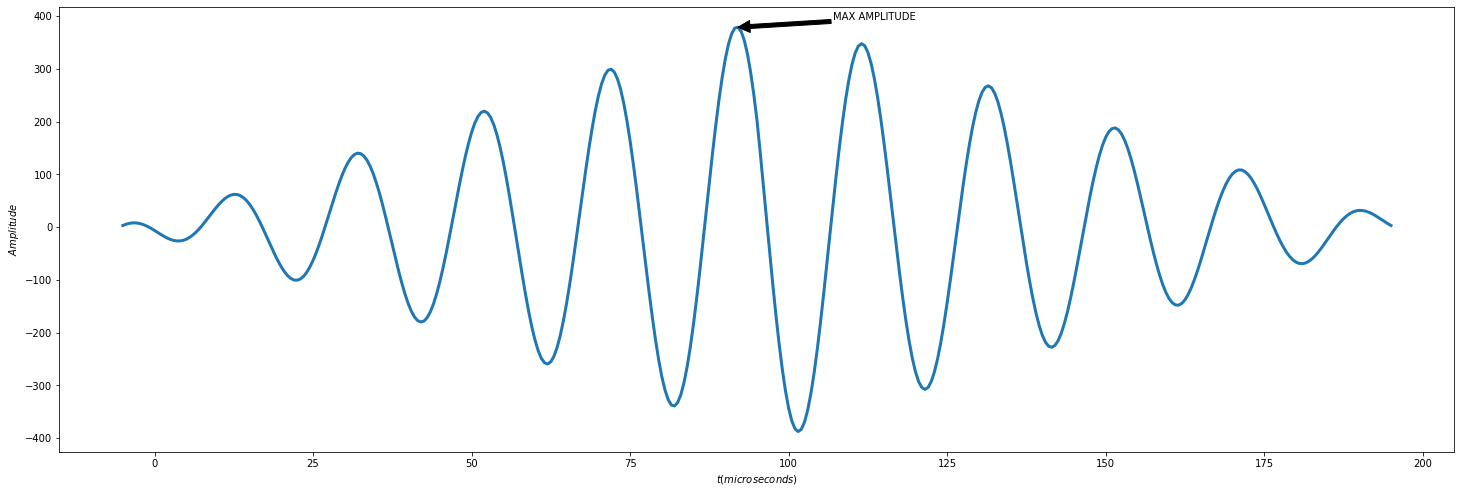

In [ ]:
import matplotlib.pyplot as plt; import numpy as np; plt.rcParams['figure.figsize']= [25,18]
fig = plt.figure()
ax = fig.add_subplot(211)
t = np.linspace(0,0.1,201)
f = 50
bx = 1.5*np.exp(-2.0*t*t);              # samples of x(t)
bh = 2*np.cos(2*np.pi*t*f + np.pi/6)
L = len(np.convolve(bh,bh)) # Length of the output vector after multplication.
plt.plot(np.arange(-5,-5+0.5*L,0.5), np.convolve(bh, bh), linewidth=3)
ymax = max(np.convolve(bh,bh))
xpos = np.where( np.convolve(bh,bh) == ymax)
xmax = np.arange(-5,-5+0.5*L,0.5)[xpos]
ax.annotate('MAX AMPLITUDE', xy=(xmax, ymax), xytext=(xmax + 15, ymax + 15), arrowprops=dict(facecolor='black'))
plt.xlabel('$t(microseconds)$'); plt.ylabel('$Amplitude$')
print(xmax)
print(L)
print(ymax)

1881.3944818383652
[0.096825]


<function matplotlib.pyplot.show(*args, **kw)>

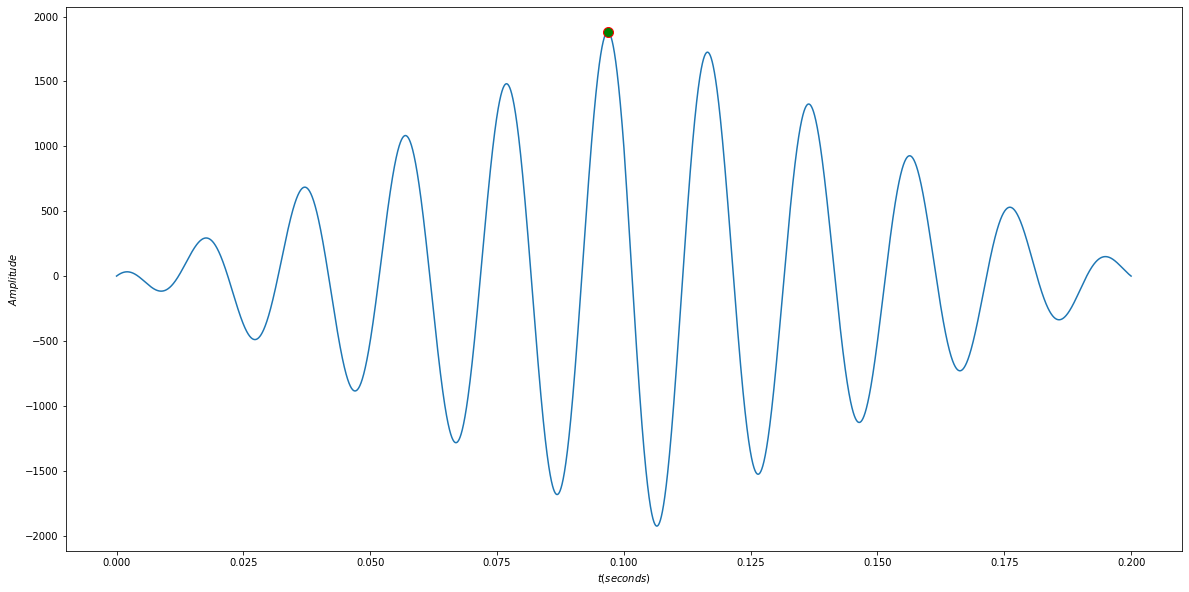

In [ ]:
import matplotlib.pyplot as plt; import numpy as np;
plt.rcParams['figure.figsize']= [20,10]
tx  = np.linspace(0,0.1,4001) 
xt   = np.cos(2*np.pi*50*tx+(np.pi/6))
t = np.linspace(0,0.2,8001)
c = np.convolve(xt,xt)
ymax=max(c)
xpos = np.where( c == ymax)
xmax=t[xpos]
print(xmax)
plt.plot(t,c)
plt.plot(xmax, ymax, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
plt.xlabel('$t(seconds)$'); plt.ylabel('$Amplitude$')
plt.show

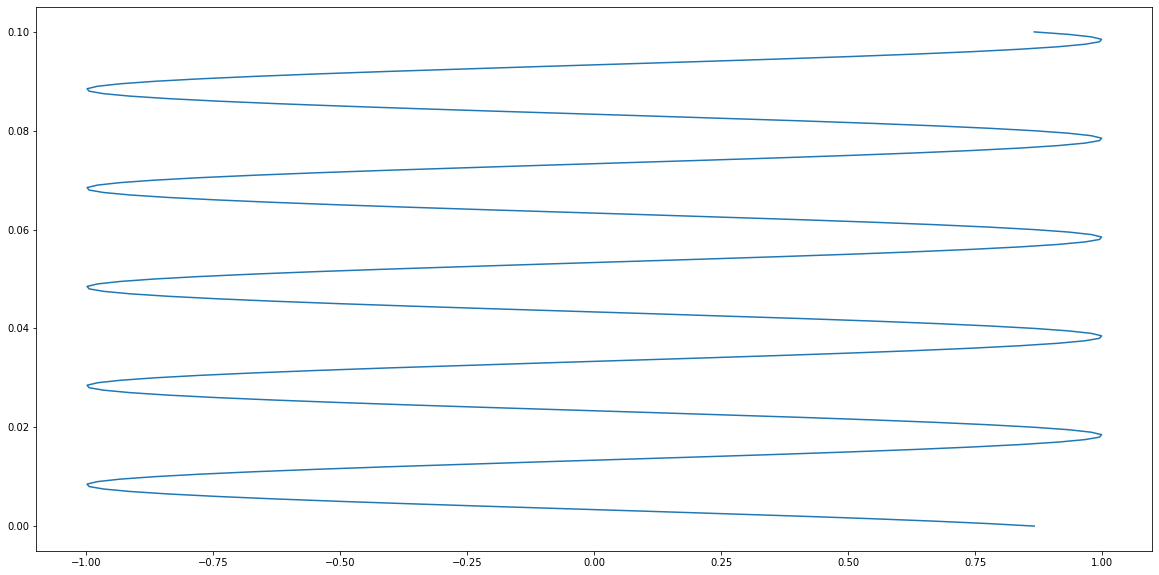

In [ ]:
import matplotlib.pyplot as plt; import numpy as np;
plt.rcParams['figure.figsize']= [20,10]
tx  = np.linspace(0,0.1,201) 
xt   = np.cos(2*np.pi*50*tx+(np.pi/6))
t = np.linspace(0,0.2,401)
c = np.convolve(xt,xt)
plt.plot(xt,tx)

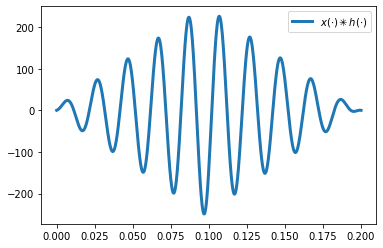

In [ ]:
import matplotlib.pyplot as plt; import numpy as np;

fs = 500 # sample rate 
f = 50 # the frequency of the signal
x = np.arange(0,0.1,0.0002) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
a=np.pi/3
y = np.cos(2*np.pi*50*(x)-a)

m =np.linspace(0,0.2,999)
plt.xlabel('', fontsize=10)
# plt.plot(x,y)
plt.plot(m,np.convolve(y,y), linewidth=3)  
plt.legend(['$x(\cdot) \, ✳ \, h(\cdot)$'])

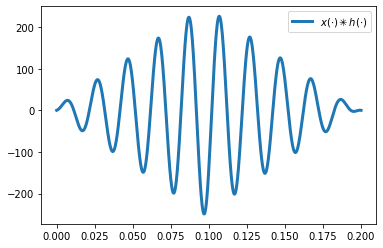

In [ ]:
import matplotlib.pyplot as plt # For ploting
import numpy as np # to work with numerical data efficiently

fs = 500 # sample rate 
f = 50 # the frequency of the signal
x = np.arange(0,0.1,0.0002) # the points on the x axis for plotting
# compute the value (amplitude) of the sin wave at the for each sample
a=np.pi/3
y = np.cos(2*np.pi*50*(x)-a)

#this instruction can only be used with IPython Notbook. 
# matplotlib inline
# showing the exact location of the smaples
# plt.stem(x,y, 'r)
m =np.linspace(0,0.2,999)
plt.xlabel('', fontsize=10)
# plt.plot(x,y)
plt.plot(m,np.convolve(y,y), linewidth=3)  # This step computes the discrete convolution and then linearly interpolates the plot.
plt.legend(['$x(\cdot) \, ✳ \, h(\cdot)$'])